# The Foundation - Autoencoders | Codecademy

By [Negar Vahid](https://www.linkedin.com/in/negar-vahid/)

[Slides](https://docs.google.com/presentation/d/1JwuwyZFfJ19bU7lxJm6BEI6jbI1Av9hVjFBB8EaJU_s/edit?usp=sharing)

Table of Content:

- Simple Autoencoder
- Sparse Autoencoder
- Conclusion
- What's Next?
- Resources

## Simple Autoencoder

Let's start with a Undercomplete(simple) Autoencoder

**Task: Reconstruct The MNIST Dataset** ⭐

To do that, let's import the needed libraries.
You're using PyTorch, and TorchVision.
TorchVision is part of PyTorch's ecosystem for handling the image dataset and performing the necessary transformations

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

Time to define your model structure.
In PyTorch, you define the structure of your model using classes.
You're creating a class Autoencoder that inherits from `nn.Module`, which is the base class for all neural network modules in PyTorch.




In [ ]:
# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


The `__init__ `method sets up the layers of the model.

`encoding_dim` is the size of the encoded (compressed) representation.

**Encoder**:

`self.encoder` is a sequence of layers that compresses the input.

`nn.Linear(784, encoding_dim)` creates a fully connected layer that transforms the input from 784 dimensions to `encoding_dim dimensions`.

`nn.ReLU()` applies the ReLU activation function, which introduces **non-linearity** to the model.

**Decoder**:
`self.decoder` is a sequence of layers that reconstructs the input from the encoded representation.

`nn.Linear(encoding_dim, 784)` creates a fully connected layer that transforms the encoded representation back to 784 dimensions (the original size).

`nn.Sigmoid()` applies the Sigmoid activation function, **which squashes the output to be between 0 and 1, suitable for image data.**

**Forward Pass:**

The forward method defines how data passes through the model.

`encoded = self.encoder(x)` passes the input x through the encoder to get the encoded representation.

`decoded = self.decoder(encoded)` passes the encoded representation through the decoder to get the reconstructed output.

return decoded returns the reconstructed output.

In [ ]:
# Hyperparameters
encoding_dim = 32
batch_size = 256
num_epochs = 50
learning_rate = 0.001

`encoding_dim = 32`:

This sets the size of the encoded (compressed) representation in the autoencoder.
The input image (originally 784 dimensions) will be compressed to 32 dimensions.

`batch_size = 256:`

This sets the number of samples processed before the model's internal parameters are updated.
Instead of updating the model for each individual image, we update it after processing 256 images at once.

`num_epochs = 50:`

This sets the number of times the entire training dataset will pass through the model.
Training will repeat the dataset 50 times to learn the optimal weights.

`learning_rate = 0.001:`

This sets the rate at which the model updates its parameters in response to the computed error during training.

> A smaller learning rate means smaller updates and more stable convergence, while a larger learning rate means faster updates but a risk of overshooting the optimal values.





In [ ]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


 `transform = transforms.Compose([transforms.ToTensor()])`:
  - This line creates a transformation that converts images to PyTorch tensors.
  - `transforms.Compose` allows us to chain multiple transformations together.
  - `transforms.ToTensor()` converts the image data from a PIL image or NumPy array to a tensor, normalizing the pixel values to the range [0, 1].


In [ ]:
# Model, Loss and Optimizer
model = Autoencoder(encoding_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

`criterion = nn.BCELoss()` sets the loss function to Binary Cross-Entropy Loss.

> `nn.BCELoss()` computes the difference between the predicted output and the actual output, treating the problem as a **binary classification task.**

This loss function is suitable for outputs with values between 0 and 1, **which matches our use of the Sigmoid activation function in the decoder.**

`optimizer = optim.Adam(model.parameters(), lr=learning_rate)` sets the optimizer to Adam (Adaptive Moment Estimation).

> optim.Adam is an optimization algorithm that adjusts the learning rate for each parameter.

`model.parameters()` provides the parameters of the model that need to be optimized.

`lr=learning_rate` sets the learning rate (defined earlier as 0.001), which controls the step size during the optimization process.

In [ ]:
# Training the model
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)

        # Forward pass
        output = model(img)
        loss = criterion(output, img)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 0.2210
Epoch [2/50], Loss: 0.1761
Epoch [3/50], Loss: 0.1510
Epoch [4/50], Loss: 0.1475
Epoch [5/50], Loss: 0.1356
Epoch [6/50], Loss: 0.1357
Epoch [7/50], Loss: 0.1274
Epoch [8/50], Loss: 0.1330
Epoch [9/50], Loss: 0.1291
Epoch [10/50], Loss: 0.1223
Epoch [11/50], Loss: 0.1221
Epoch [12/50], Loss: 0.1187
Epoch [13/50], Loss: 0.1264
Epoch [14/50], Loss: 0.1212
Epoch [15/50], Loss: 0.1227
Epoch [16/50], Loss: 0.1185
Epoch [17/50], Loss: 0.1157
Epoch [18/50], Loss: 0.1284
Epoch [19/50], Loss: 0.1209
Epoch [20/50], Loss: 0.1143
Epoch [21/50], Loss: 0.1169
Epoch [22/50], Loss: 0.1255
Epoch [23/50], Loss: 0.1162
Epoch [24/50], Loss: 0.1160
Epoch [25/50], Loss: 0.1212
Epoch [26/50], Loss: 0.1205
Epoch [27/50], Loss: 0.1260
Epoch [28/50], Loss: 0.1228
Epoch [29/50], Loss: 0.1134
Epoch [30/50], Loss: 0.1230
Epoch [31/50], Loss: 0.1192
Epoch [32/50], Loss: 0.1209
Epoch [33/50], Loss: 0.1138
Epoch [34/50], Loss: 0.1178
Epoch [35/50], Loss: 0.1116
Epoch [36/50], Loss: 0.1195
E

`for data in train_loader`:

This loop iterates over the training dataset in batches.
train_loader is the data loader that loads the data in batches (defined earlier with a batch size of 256).

`img, _ = data:`

This line extracts the images from the batch.
_ is used to ignore the labels, **as we only need the images for the autoencoder.**

`img.view(img.size(0), -1)` reshapes img to have the same batch size, but flattens all other dimensions into a single dimension. For example, if img originally has the shape [batch_size, 1, 28, 28] (which is common for MNIST images, where each image is 28x28 pixels and the 1 indicates a single color channel), this line will reshape it to [batch_size, 784], where 784 is the result of multiplying 28x28. This flattening is often done before feeding the images into a fully connected layer of a neural network.

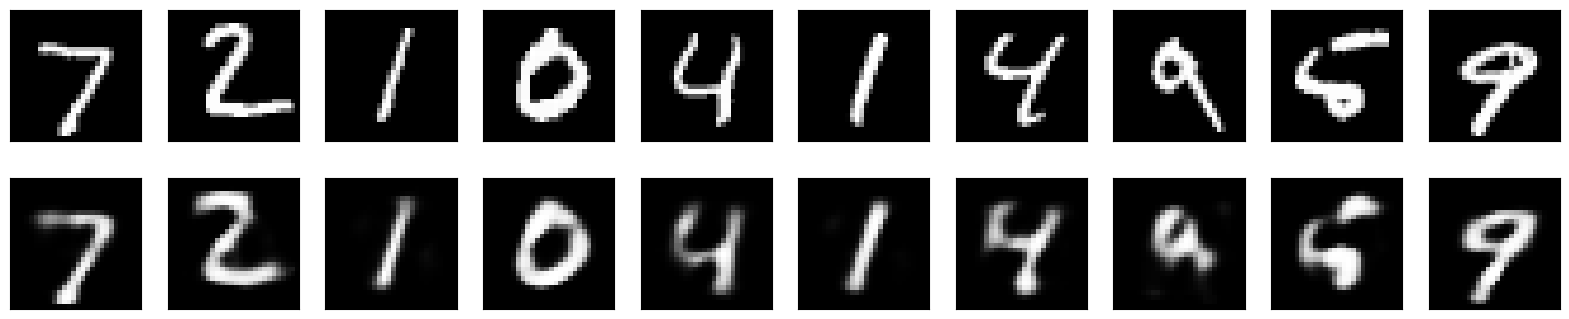

In [ ]:
# Use the trained model to encode and decode test digits
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        encoded_imgs = model.encoder(img)
        decoded_imgs = model.decoder(encoded_imgs)
        break

# Convert torch tensors to numpy arrays for visualization
decoded_imgs_np = decoded_imgs.view(-1, 1, 28, 28).cpu().numpy()

# Display original and reconstructed digits
import matplotlib.pyplot as plt

n = 10  # How many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img[i].view(28, 28).cpu().numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_np[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Sparse Autoencoder

You're keeping everything the same, but you're adding a Sparsity constraint to your model

In [ ]:
# Define the Autoencoder model with sparsity
class SparseAutoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(SparseAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

In [ ]:
# Hyperparameters
encoding_dim = 32
batch_size = 256
num_epochs = 50
learning_rate = 0.001
sparsity_lambda = 0.001  # Weight of the sparsity penalty term
rho = 0.05  # Desired average activation of the hidden units
epsilon = 1e-10


**Sparsity Lambda (sparsity_lambda)(λ)**:
Setting the importance of sparsity.
   - If you set it higher, you're saying sparsity is more important.
   - If you set it lower, you're saying sparsity is less important.

**Desired Average Activation (rho) $$\rho\ $$**:
   - Imagine each hidden unit in your neural network wants to be active some of the time but not all the time.**This 'rho' tells us how active we want each hidden unit to be on average.**
   - For example, if rho is 0.05, we want each hidden unit to be active about 5% of the time.

**Small Constant (epsilon) (ε)**:
🤔 Why do you think we need this?



In [ ]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Model, Loss and Optimizer
model = Autoencoder(encoding_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Remember when you learned about **Sparse Autoencoders** with the **KL Divergence?** Now you need to implement it! 🥲

Create a function for it here:


$$
KL(\rho \parallel \hat{\rho}) = \sum_{j=1}^{n} \left( \rho \log \frac{\rho}{\hat{\rho}_j} + (1 - \rho) \log \frac{1 - \rho}{1 - \hat{\rho}_j} \right)
$$




Rho: Desired average activation of the hidden units (target sparsity).

Rho Hat: Actual average activation of the hidden units over the training samples.

Epsilon: Small constant to avoid numerical issues.

Hints:

torch.mean

torch.clamp(input, min, max, out=None)
A PyTorch function that clamps (limits) the values of a tensor to be within a specified range.

In [ ]:
# Function to compute the KL divergence
def kl_divergence(rho, rho_hat):
    rho_hat = torch.mean(rho_hat, dim=0)
    rho_hat = torch.clamp(rho_hat, epsilon, 1 - epsilon)  # Prevent log(0) or division by zero
    return torch.sum(rho * torch.log(rho / rho_hat) + (1 - rho) * torch.log((1 - rho) / (1 - rho_hat)))

In [ ]:
# Training the model
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)

        # Forward pass
        output, encoded = model(img)
        loss = criterion(output, img)

        # Compute sparsity penalty
        sparsity_loss = sparsity_lambda * kl_divergence(rho, encoded)

        # Total loss
        total_loss = loss + sparsity_loss

        # Backward pass
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss.item():.4f}')

Epoch [1/50], Loss: 0.1755
Epoch [2/50], Loss: 0.1661
Epoch [3/50], Loss: 0.1572
Epoch [4/50], Loss: 0.1561
Epoch [5/50], Loss: 0.1475
Epoch [6/50], Loss: 0.1428
Epoch [7/50], Loss: 0.1409
Epoch [8/50], Loss: 0.1359
Epoch [9/50], Loss: 0.1268
Epoch [10/50], Loss: 0.1285
Epoch [11/50], Loss: 0.1326
Epoch [12/50], Loss: 0.1226
Epoch [13/50], Loss: 0.1267
Epoch [14/50], Loss: 0.1237
Epoch [15/50], Loss: 0.1233
Epoch [16/50], Loss: 0.1226
Epoch [17/50], Loss: 0.1215
Epoch [18/50], Loss: 0.1168
Epoch [19/50], Loss: 0.1162
Epoch [20/50], Loss: 0.1189
Epoch [21/50], Loss: 0.1213
Epoch [22/50], Loss: 0.1173
Epoch [23/50], Loss: 0.1182
Epoch [24/50], Loss: 0.1148
Epoch [25/50], Loss: 0.1132
Epoch [26/50], Loss: 0.1129
Epoch [27/50], Loss: 0.1123
Epoch [28/50], Loss: 0.1126
Epoch [29/50], Loss: 0.1157
Epoch [30/50], Loss: 0.1151
Epoch [31/50], Loss: 0.1122
Epoch [32/50], Loss: 0.1099
Epoch [33/50], Loss: 0.1124
Epoch [34/50], Loss: 0.1047
Epoch [35/50], Loss: 0.1111
Epoch [36/50], Loss: 0.1047
E

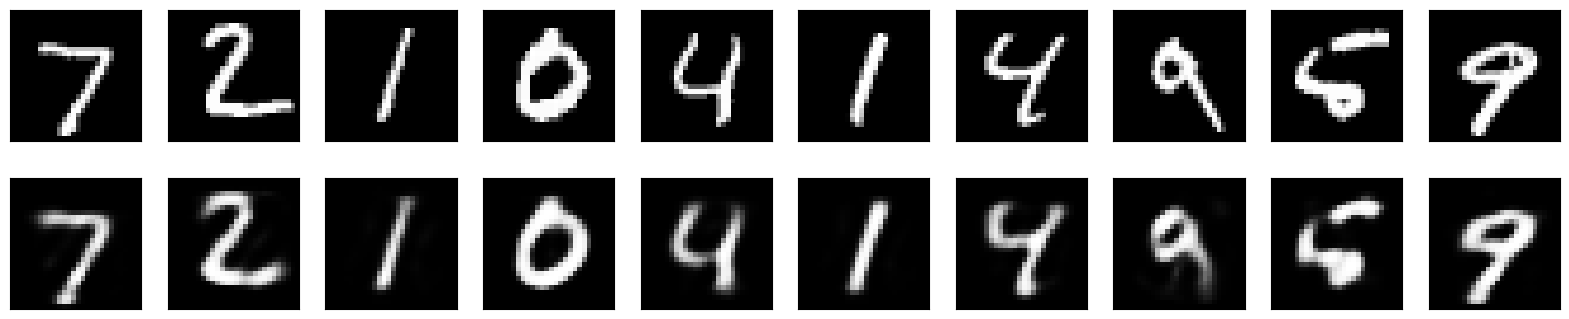

In [ ]:
# Use the trained model to encode and decode test digits
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        encoded_imgs = model.encoder(img)
        decoded_imgs = model.decoder(encoded_imgs)
        break

# Convert torch tensors to numpy arrays for visualization
decoded_imgs_np = decoded_imgs.view(-1, 1, 28, 28).cpu().numpy()

# Display original and reconstructed digits
import matplotlib.pyplot as plt

n = 10  # How many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img[i].view(28, 28).cpu().numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_np[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



## Conclusion 🤸

## What's Next?

To improve the model, you can experiment with the hyperparameters that you used earlier, like the encoding dimension, batch size, number of epochs, and learning rate.

Additionally, when you're working with images, it's often beneficial to use Convolutional layers instead of just fully connected (dense) layers. Convolutional layers, or Conv2d layers in PyTorch, are designed to handle the spatial structure of images better.

By adding convolutional layers to your autoencoder, you can capture important features in the images more effectively. This typically leads to better performance, especially for tasks involving image data.

Here's a quick outline of what you can do:

- Add Conv2d layers in the encoder part of the autoencoder to capture spatial features from the input images.

- Use ConvTranspose2d layers in the decoder part to reconstruct the images from the encoded features.

Check out [PyTorch's Docs](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) that explain how to use convolutional layers.

Now you know what an autoencoder is and how to build one. In the next lesson, you'll learn how to build a Variational Autoencoder (VAE). A VAE is a more advanced type of autoencoder that not only learns to compress and reconstruct data but can also generate new data points. It relies on the same concepts you learned today but adds some extra features to make it even more powerful.

In the next event, you'll train a VAE on a dataset of handwritten digits MNIST(Just like today). After training, you will sample points from the latent space to generate new, unique handwritten digits that look similar to those in the dataset, even though they were never seen during training.

### Enhance Your CV

Project Idea: Use a Sparse Convolutional Autoencoder to Denoise an Image Dataset

Suggested Dataset: [CIFAR-10 dataset](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html) -- consists of 60,000 32x32 color images in 10 different classes (airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks).

## Resources

[PyTorch DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)


[TensorFlow: Introduction to Autoencoders](https://www.tensorflow.org/tutorials/generative/autoencoder)

[IBM: What are Autoencoders? (Video)](https://www.youtube.com/watch?v=qiUEgSCyY5o)

[Codecademy: Intro to PyTorch and Neural Networks](https://www.codecademy.com/learn/intro-to-py-torch-and-neural-networks)

[Codecademy: PyTorch For Classification](https://www.codecademy.com/enrolled/courses/py-torch-for-classification)

[Codecademy: Fundamental Math for Data Science](https://www.codecademy.com/enrolled/paths/fundamental-math-for-data-science)

[Codecademy: Introduction To HuggingFace](https://www.codecademy.com/article/getting-started-with-hugging-face)

[Real Python: PyTorch Vs TensorFlow](https://realpython.com/pytorch-vs-tensorflow/)

